# Lectura 5 (Ejercicio) Visualización de datos y Árboles de Decisión
## Aplicaciones de Minéria de Datos
### Marzo, 2023

<p>El siguiente conjunto de datos esta relacionado a cryptojacking.</p>

<p><i>El criptojacking es un tipo de ciberdelincuencia en el que un delincuente utiliza secretamente la potencia de cálculo de la víctima para generar criptomonedas.</i></p>

<p>Las características conforman los siguiente</p>


![title](Figuras/1.png)

<p>Realice y conteste las siguientes preguntas. Puedes apoyarte de las Lecturas 1-4</p>

<ol>
<li>¿Cuáles son las medidas de la tendencia central por cada característica, y qué valores tienen?</li>
<li>¿Qué tipo de datos tiene cada característica?</li>
<li>Muestra una tabla de distribución de frecuencias de una característica</li> 
<li>Muestra el histograma de una característica deseada</li>
<li>¿Cuáles son los valores de la derivación de la media y la derivación de la media absoluta?</li>
<li>Grafique el diagrama de caja de por lo menos tres características</li>
<li>Muestra el valor de la oblicuidad de por lo menos una característica</li>
<li>Muestra la matriz de correlación de todas las características</li>
<li>Muestra la matriz de correlación (sopa de plasma) de una característica a elegir, comparada con por lo menos otras ocho, donde la correlación es más alta</li>
    <li>Entrene el conjunto de datos mediante el algoritmo de Árboles de Decisión</li>
    <ul><li>Recuerda utilizar el 60% de los datos para entrenamiento y el 40% restante para validación</li>
        <li>Presenta el reporte de clasificación: precisión, exhaustividad y puntaje-f1</li>
        <li>La columna <code>Label</code> representa a la etiqueta</li>
    </ul>
</ol>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
from matplotlib import pyplot as plt

In [2]:
#importar el conjunto de datos
dataset = pd.read_csv('../datasets/dataset_MR_V5_ID.csv')

In [3]:
#Mostrar las primeras cinco muestras
dataset.head()

Hora         C1   C2   C3  \
0  05/21/2019 17:20:22.015  92.153928  0.0  0.0   
1  05/21/2019 17:21:07.011  93.336042  0.0  0.0   
2  05/21/2019 17:21:52.002  98.695494  0.0  0.0   
3  05/21/2019 17:22:37.002  97.723444  0.0  0.0   
4  05/21/2019 17:23:22.021  98.710094  0.0  0.0   

   Proceso(chrome)\Operaciones de ES de datos/s  \
0                                     32.709430   
1                                     15.070699   
2                                      0.866827   
3                                      0.044444   
4                                      0.000000   

   Proceso(chrome)\Bytes de datos ES/s  Proceso(chrome) subprocesos  \
0                         1.211241e+05                         40.0   
1                         3.100975e+06                         32.0   
2                         8.539578e+02                         29.0   
3                         1.653326e+01                         27.0   
4                         0.000000e+00                         27.0   

   Proceso(chrome)\% de tiempo de procesador  Escrituras en disco/s  \
0                                   0.496719               6.088173   
1                                   8.299424              19.871984   
2                                   0.000000               4.378587   
3                                   0.000000               1.088884   
4                                   0.000000               2.243506   

   Lecturas de disco/s  Bytes enviados/s  Bytes recibidos/s  \
0             1.325547        549.250711       13018.949981   
1             0.155597         34.498119          32.586497   
2             0.000000         20.559356          26.093712   
3             0.000000         40.710932          24.666558   
4             0.000000         50.467775          24.656351   

   Paquetes enviados/s  Paquetes recibidos/s  Lecturas de paginas/s  \
0             4.197994             10.542667               1.024380   
1             0.489020              0.444563               0.288966   
2             0.333395              0.355621               0.022226   
3             0.444442              0.333332               0.022222   
4             0.510897              0.333194               0.000000   

   Escrituras de paginas/s  Errores de pagina/s  bytes confirmados en uso  \
0                 0.006446          3111.005099                 21.375443   
1                 0.000000          6081.471589                 21.131621   
2                 0.000000           262.270699                 21.060478   
3                 0.000000           725.996801                 20.978489   
4                 0.000000           260.424379                 20.942650   

   utilidad del procesador  Label  
0                 7.849272      0  
1                 6.652355      0  
2                 1.304476      0  
3                 2.276608      0  
4                 1.290458      0

1 ¿Cuáles son las medidas de la tendencia central por cada característica, y qué valores tienen?

In [4]:
dataset.describe()

C1       C2       C3  \
count  12726.000000  12726.0  12726.0   
mean      68.520095      0.0      0.0   
std       39.805131      0.0      0.0   
min        0.000000      0.0      0.0   
25%       18.258118      0.0      0.0   
50%       90.874992      0.0      0.0   
75%       97.692296      0.0      0.0   
max      100.983866      0.0      0.0   

       Proceso(chrome)\Operaciones de ES de datos/s  \
count                                  12726.000000   
mean                                      36.136787   
std                                       72.262645   
min                                        0.000000   
25%                                        1.733756   
50%                                       12.089963   
75%                                       35.681971   
max                                     1795.316255   

       Proceso(chrome)\Bytes de datos ES/s  Proceso(chrome) subprocesos  \
count                         1.272600e+04                 12726.000000   
mean                          1.113026e+05                    29.820304   
std                           4.794091e+05                     5.677206   
min                           0.000000e+00                     1.000000   
25%                           8.324397e+02                    27.000000   
50%                           5.072812e+03                    28.000000   
75%                           3.979343e+04                    30.000000   
max                           4.677280e+06                    51.000000   

       Proceso(chrome)\% de tiempo de procesador  Escrituras en disco/s  \
count                               12726.000000           12726.000000   
mean                                    0.488521               5.336215   
std                                     1.551592              18.076221   
min                                     0.000000               0.044437   
25%                                     0.000000               0.755798   
50%                                     0.034734               1.711436   
75%                                     0.451386               5.909197   
max                                    25.246148            1064.819285   

       Lecturas de disco/s  Bytes enviados/s  Bytes recibidos/s  \
count         12726.000000      12726.000000       1.272600e+04   
mean              0.980885        538.143963       1.539497e+04   
std              13.805087       1766.385389       8.079211e+04   
min               0.000000          1.194623       1.553716e+00   
25%               0.000000         33.395188       2.729592e+01   
50%               0.000000         66.874590       8.624177e+01   
75%               0.022229        218.106900       5.477529e+02   
max             831.503948      98097.784301       4.812144e+06   

       Paquetes enviados/s  Paquetes recibidos/s  Lecturas de paginas/s  \
count         12726.000000          12726.000000           12726.000000   
mean              4.546930             11.846439               0.992680   
std              18.603816             54.947218              12.073777   
min               0.022123              0.022123               0.000000   
25%               0.399965              0.332985               0.000000   
50%               0.710868              0.622357               0.022222   
75%               1.536102              1.711050               0.088888   
max            1118.878021           3183.701036             475.031124   

       Escrituras de paginas/s  Errores de pagina/s  bytes confirmados en uso  \
count             12726.000000         12726.000000              12726.000000   
mean                  0.004320          2760.235827                 28.455869   
std                   0.086336          4905.270569                  3.963335   
min                   0.000000            16.143987                 18.057942   
25%                   0.000000           353.279120                 25.264804   
50%                   0.000000   

2. ¿Qué tipo de datos tiene cada característica?

In [5]:
dataset.dtypes

Hora                                             object
C1                                              float64
C2                                              float64
C3                                              float64
Proceso(chrome)\Operaciones de ES de datos/s    float64
Proceso(chrome)\Bytes de datos ES/s             float64
Proceso(chrome) subprocesos                     float64
Proceso(chrome)\% de tiempo de procesador       float64
Escrituras en disco/s                           float64
Lecturas de disco/s                             float64
Bytes enviados/s                                float64
Bytes recibidos/s                               float64
Paquetes enviados/s                             float64
Paquetes recibidos/s                            float64
Lecturas de paginas/s                           float64
Escrituras de paginas/s                         float64
Errores de pagina/s                             float64
bytes confirmados en uso                        

3. Muestra una tabla de distribución de frecuencias de una característica

In [6]:
dataset.groupby("Proceso(chrome) subprocesos").\
agg(frequency=('Proceso(chrome) subprocesos',"count"))

frequency
Proceso(chrome) subprocesos           
1.000000                            13
2.000000                             1
6.000000                             1
7.000000                             3
23.000000                           22
24.000000                          146
25.000000                          679
26.000000                         1169
27.000000                         3958
28.000000                         1787
28.034714                            6
29.000000                         1090
30.000000                          737
30.407359                           25
30.516591                           48
31.000000                          534
32.000000                          494
33.000000                          315
34.000000                          127
35.000000                           76
36.000000                           56
37.000000                           47
38.000000                           48
39.000000                           77
40.000000                          113
41.000000                          160
42.000000                          122
43.000000                           94
44.000000                           75
45.000000                           52
46.000000                           64
47.000000                          296
48.000000                          266
49.000000                           21
50.000000                            3
51.000000                            1

4 .Muestra el histograma de una característica deseada

<AxesSubplot:ylabel='Frequency'>

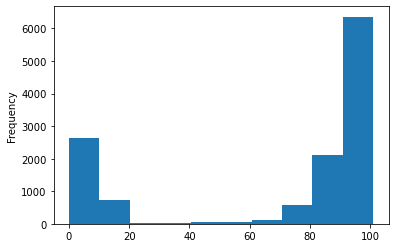

In [12]:
dataset["C1"].plot.hist()

5. ¿Cuáles son los valores de la derivación de la media y la derivación de la media absoluta?

In [34]:
def derivacionMedia(columna,tipo="abs"):
    resultado = []
    media = statistics.mean(columna)
    for valor in columna:
        if tipo=="abs":
            resultado.append(abs(valor-media))
        else:
            resultado.append(valor-media)
    return resultado

In [35]:
derivacionmedia = derivacionMedia(dataset["C1"])
#primeras diez muestras
derivacionmedia[0:10]

[23.633833244676268,
 24.815946722870507,
 30.17539873430735,
 29.203348846250293,
 30.189998744424784,
 30.255493035986873,
 15.071200830216142,
 28.247978849566792,
 28.609624310125227,
 28.320190777137185]

In [36]:
derivacionmedia = derivacionMedia(dataset["C1"],"noabs")
#primeras diez muestras
derivacionmedia[0:10]

[23.633833244676268,
 24.815946722870507,
 30.17539873430735,
 29.203348846250293,
 30.189998744424784,
 30.255493035986873,
 15.071200830216142,
 28.247978849566792,
 28.609624310125227,
 28.320190777137185]

6. Grafique el diagrama de caja de por lo menos tres características

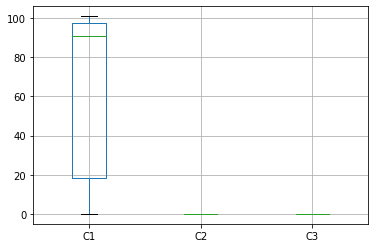

In [47]:
pd.DataFrame(dataset[['C1','C2','C3']]).boxplot();

7. Muestra el valor de la oblicuidad de por lo menos una característica

In [48]:
print("La oblicuidad es:",dataset['C1'].skew())

La oblicuidad es: -0.9664004617320588


8. Muestra la matriz de correlación de todas las características

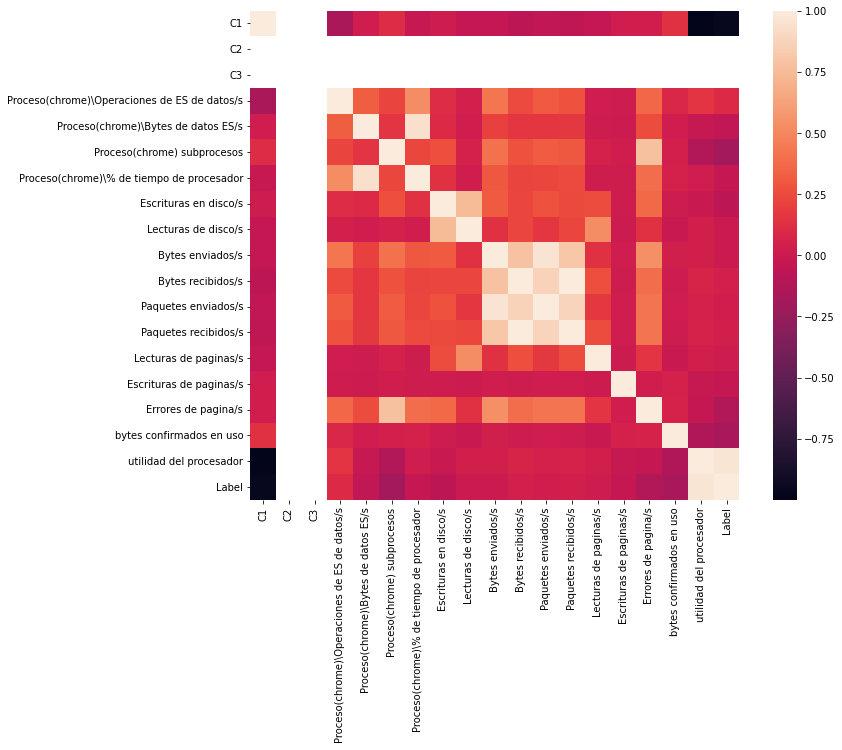

In [49]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

9. Muestra la matriz de correlación (sopa de plasma) de una característica a elegir, comparada con por lo menos otras ocho, donde la correlación es más alta

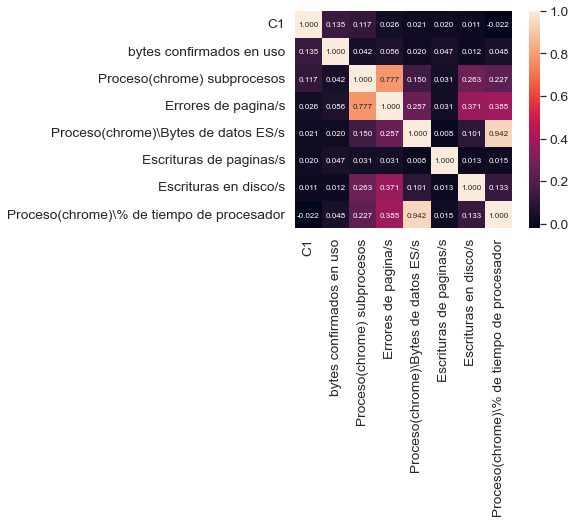

In [56]:
k = 8
cols = corrmat.nlargest(k,'C1')['C1'].index
cm = np.corrcoef(dataset[cols].values.T)
#código de graficas
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,
                 annot=True, 
                 square=True, 
                 fmt='.3f', 
                 annot_kws={'size':8}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

10. Entrene el conjunto de datos mediante el algoritmo de Árboles de Decisión

In [57]:
#Importar el estimador
from sklearn.tree import DecisionTreeClassifier
#Método para dividir el conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

In [69]:
y = dataset['Label']
X = dataset.drop(columns=['Label','Hora'])

In [70]:
X.head()

C1   C2   C3  Proceso(chrome)\Operaciones de ES de datos/s  \
0  92.153928  0.0  0.0                                     32.709430   
1  93.336042  0.0  0.0                                     15.070699   
2  98.695494  0.0  0.0                                      0.866827   
3  97.723444  0.0  0.0                                      0.044444   
4  98.710094  0.0  0.0                                      0.000000   

   Proceso(chrome)\Bytes de datos ES/s  Proceso(chrome) subprocesos  \
0                         1.211241e+05                         40.0   
1                         3.100975e+06                         32.0   
2                         8.539578e+02                         29.0   
3                         1.653326e+01                         27.0   
4                         0.000000e+00                         27.0   

   Proceso(chrome)\% de tiempo de procesador  Escrituras en disco/s  \
0                                   0.496719               6.088173   
1                                   8.299424              19.871984   
2                                   0.000000               4.378587   
3                                   0.000000               1.088884   
4                                   0.000000               2.243506   

   Lecturas de disco/s  Bytes enviados/s  Bytes recibidos/s  \
0             1.325547        549.250711       13018.949981   
1             0.155597         34.498119          32.586497   
2             0.000000         20.559356          26.093712   
3             0.000000         40.710932          24.666558   
4             0.000000         50.467775          24.656351   

   Paquetes enviados/s  Paquetes recibidos/s  Lecturas de paginas/s  \
0             4.197994             10.542667               1.024380   
1             0.489020              0.444563               0.288966   
2             0.333395              0.355621               0.022226   
3             0.444442              0.333332               0.022222   
4             0.510897              0.333194               0.000000   

   Escrituras de paginas/s  Errores de pagina/s  bytes confirmados en uso  \
0                 0.006446          3111.005099                 21.375443   
1                 0.000000          6081.471589                 21.131621   
2                 0.000000           262.270699                 21.060478   
3                 0.000000           725.996801                 20.978489   
4                 0.000000           260.424379                 20.942650   

   utilidad del procesador  
0                 7.849272  
1                 6.652355  
2                 1.304476  
3                 2.276608  
4                 1.290458

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.6)

In [83]:
arbol = DecisionTreeClassifier()

In [84]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
from sklearn.metrics import classification_report

In [87]:
y_pred = arbol.predict(X_test)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3683
           1       0.99      0.99      0.99      1408

    accuracy                           0.99      5091
   macro avg       0.99      0.99      0.99      5091
weighted avg       0.99      0.99      0.99      5091

